1. Importing Modules and Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


2. EDA - Data Understanding and Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   category
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6529 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [ ]:
df.dropna(inplace=True)


In [11]:
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6378 non-null   int64   
 1   Attendance                  6378 non-null   int64   
 2   Parental_Involvement        6378 non-null   category
 3   Access_to_Resources         6378 non-null   category
 4   Extracurricular_Activities  6378 non-null   category
 5   Sleep_Hours                 6378 non-null   int64   
 6   Previous_Scores             6378 non-null   int64   
 7   Motivation_Level            6378 non-null   category
 8   Internet_Access             6378 non-null   category
 9   Tutoring_Sessions           6378 non-null   int64   
 10  Family_Income               6378 non-null   category
 11  Teacher_Quality             6378 non-null   category
 12  School_Type                 6378 non-null   category
 13  Peer_Influence         

In [13]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


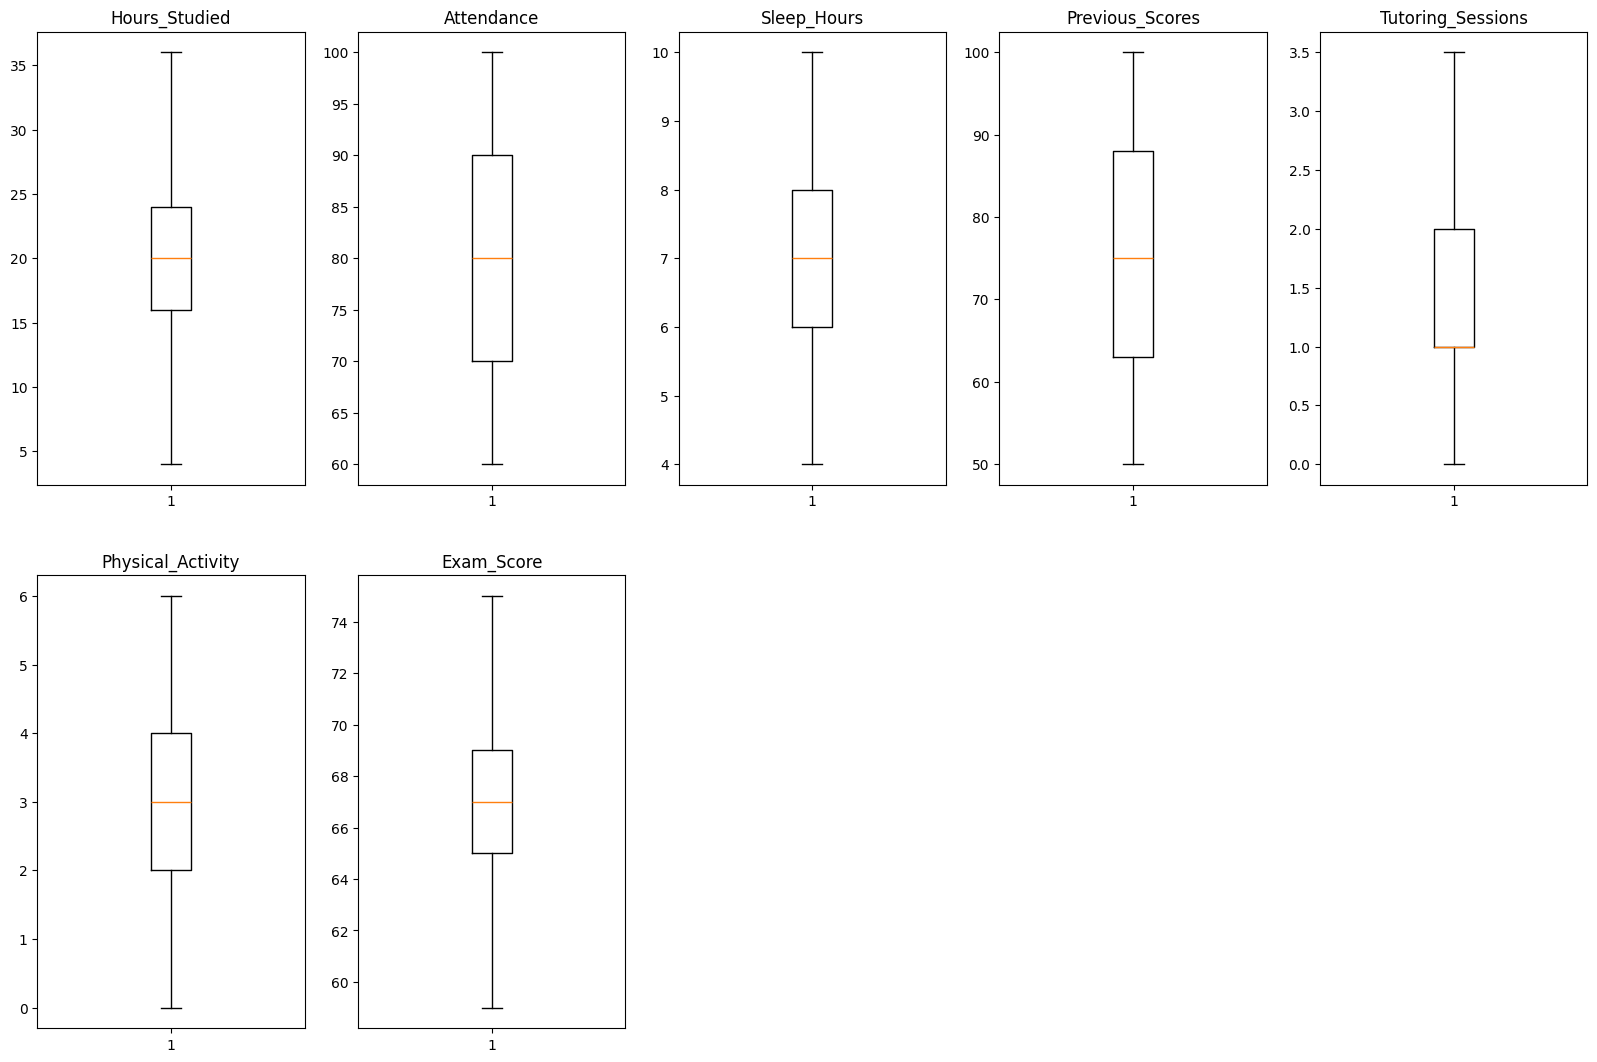

In [14]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for feature in numeric_columns:
    first_quartile = df[feature].quantile(0.25)
    third_quartile = df[feature].quantile(0.75)
    iqr = third_quartile - first_quartile

    upper_limit = third_quartile + 1.5 * iqr
    lower_limit = first_quartile - 1.5 * iqr

    lower_outliers = df[df[feature] < lower_limit][feature].values
    upper_outliers = df[df[feature] > upper_limit][feature].values

    df[feature] = df[feature].replace(lower_outliers, lower_limit)
    df[feature] = df[feature].replace(upper_outliers, upper_limit)

# Re-select numeric columns to reflect any updates
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 20))
for index, feature in enumerate(numeric_columns):
    plt.subplot(3, 5, index + 1)
    plt.boxplot(df[feature])
    plt.title(f"{feature}")
plt.show()


In [15]:
ordinal_encoding = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2},
    'Peer_Influence': {'Negative': 0, 'Neutral': 1, 'Positive': 2}
}

for feature_name, encode_map in ordinal_encoding.items():
    df[feature_name] = df[feature_name].map(encode_map)


In [16]:
categorical_features = [
    'Extracurricular_Activities', 
    'Internet_Access', 
    'Learning_Disabilities', 
    'School_Type', 
    'Gender'
]

# Apply one-hot encoding while avoiding multicollinearity
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)


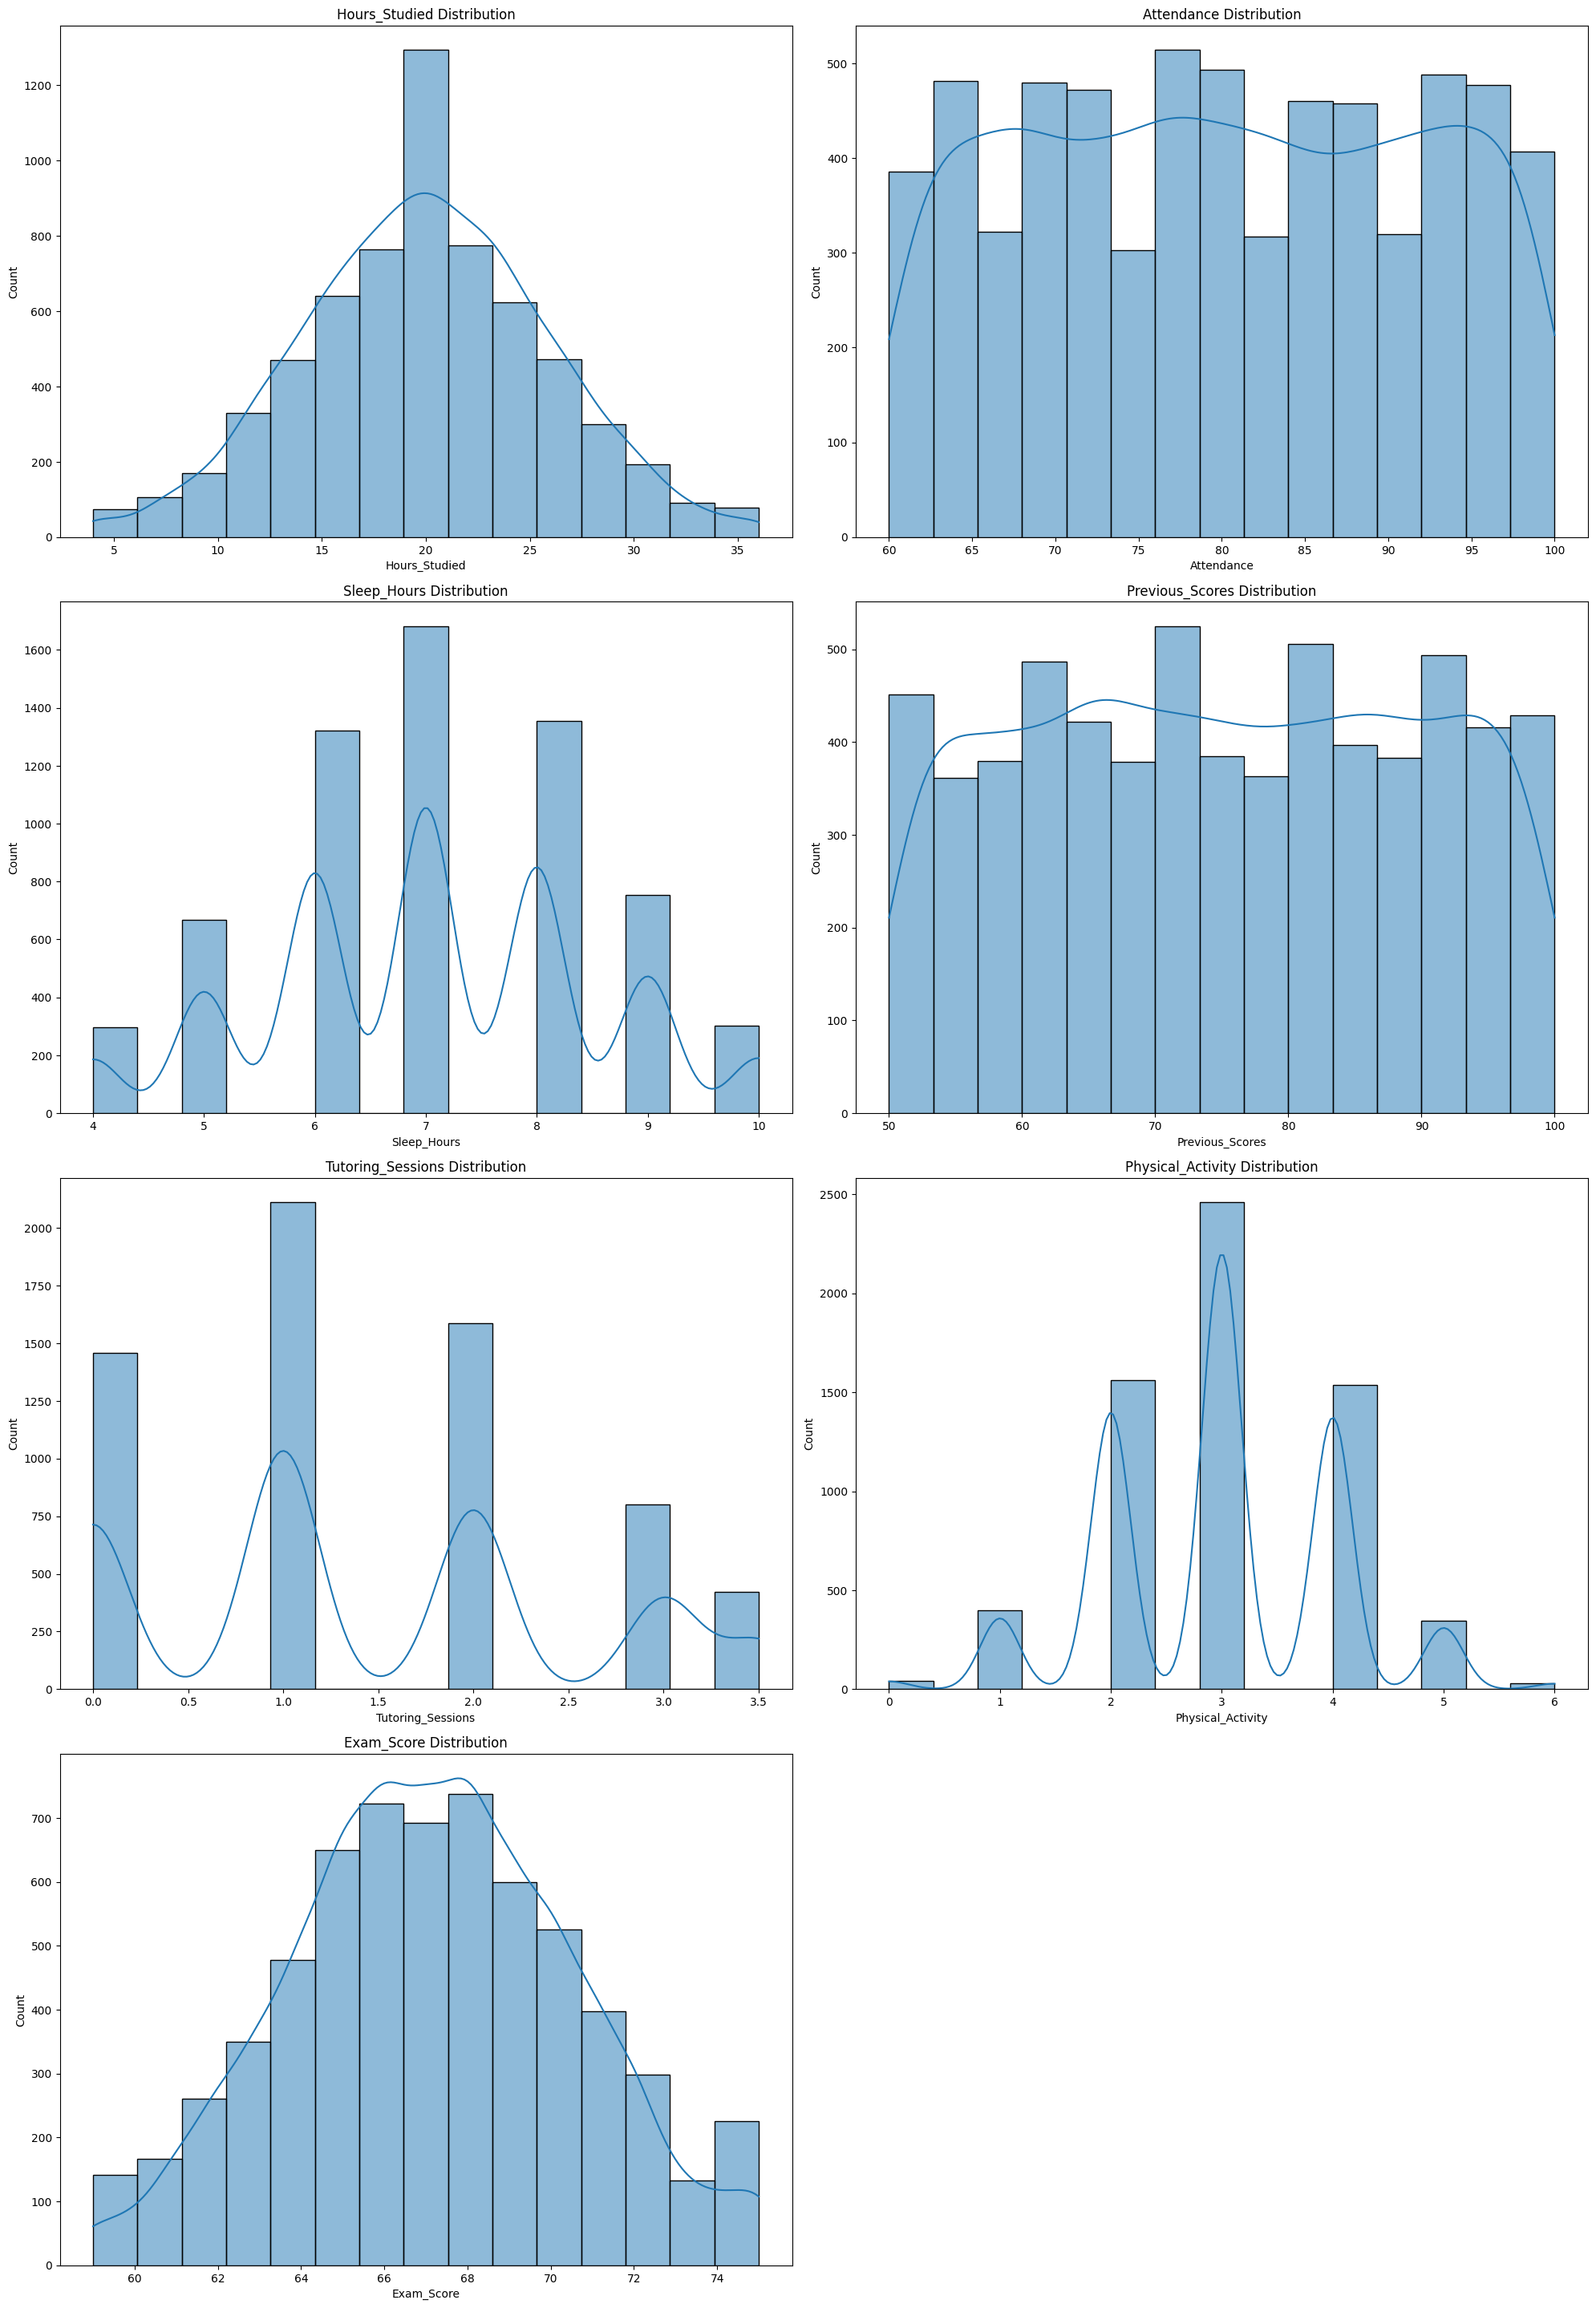

In [18]:
plt.figure(figsize=(20, 50))

for idx, feature in enumerate(numeric_columns):
    plt.subplot(7, 2, idx + 1)
    sns.histplot(data=df[feature], kde=True, bins=15, edgecolor='black')
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()


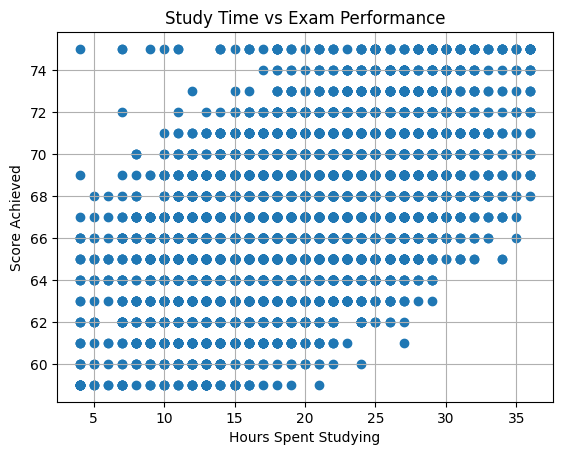

In [19]:
plt.scatter(df['Hours_Studied'], df['Exam_Score'])
plt.title('Study Time vs Exam Performance')
plt.xlabel('Hours Spent Studying')
plt.ylabel('Score Achieved')
plt.grid(visible=True)


3. Model Training

In [20]:
features = df.drop(columns=['Exam_Score'])
target = df['Exam_Score']

X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(
    features, target, test_size=0.2, random_state=42
)

regressor = LinearRegression()
regressor.fit(X_train_set, y_train_set)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
y_predicted = regressor.predict(X_test_set)


In [22]:
print("R² Score:", r2_score(y_test_set, y_predicted))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test_set, y_predicted))
print("Mean Squared Error (MSE):", mean_squared_error(y_test_set, y_predicted))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test_set, y_predicted)))


R² Score: 0.9318073321650622
Mean Absolute Error (MAE): 0.3623236227215284
Mean Squared Error (MSE): 0.7970117315587096
Root Mean Squared Error (RMSE): 0.8927551352743426


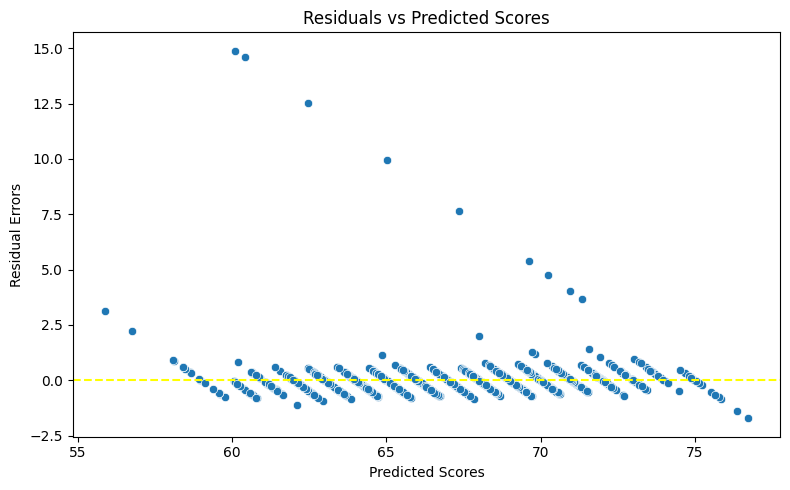

In [27]:
residual_errors = y_test_set - y_predicted

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_predicted, y=residual_errors)
plt.axhline(0, color='yellow', linestyle='--')
plt.xlabel("Predicted Scores")
plt.ylabel("Residual Errors")
plt.title("Residuals vs Predicted Scores")
plt.tight_layout()
plt.show()


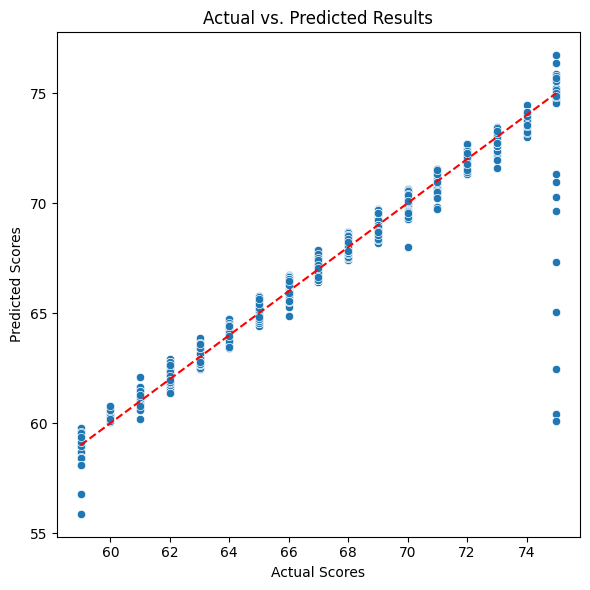

In [24]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test_set, y=y_predicted)
plt.plot(
    [y_test_set.min(), y_test_set.max()],
    [y_test_set.min(), y_test_set.max()],
    color='red',
    linestyle='--'
)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs. Predicted Results")
plt.tight_layout()
plt.show()


In [25]:
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Weight': regressor.coef_
}).sort_values(by='Weight', key=abs, ascending=False)

print(feature_importance.head(10))


                           Feature    Weight
3              Access_to_Resources  0.987076
2             Parental_Involvement  0.980677
15             Internet_Access_Yes  0.976432
16       Learning_Disabilities_Yes -0.866348
6                 Motivation_Level  0.533560
7                Tutoring_Sessions  0.532161
9                  Teacher_Quality  0.518347
8                    Family_Income  0.505778
12        Parental_Education_Level  0.504433
14  Extracurricular_Activities_Yes  0.500702


Bonus - Polynomial Regression

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Separate features and target
input_features = df.drop(columns=['Exam_Score'])
target_variable = df['Exam_Score']

# Train-test split
X_train_set, X_test_set, y_train_set, y_test_set = train_test_split(
    input_features, target_variable, test_size=0.2, random_state=42
)

# Create polynomial features
poly_transformer = PolynomialFeatures(degree=1)
X_train_poly = poly_transformer.fit_transform(X_train_set)
X_test_poly = poly_transformer.transform(X_test_set)

# Fit the linear regression model
polynomial_model = LinearRegression()
polynomial_model.fit(X_train_poly, y_train_set)

# Predict and evaluate
predicted_scores = polynomial_model.predict(X_test_poly)

print("R² Score:", r2_score(y_test_set, predicted_scores))
print("Mean Absolute Error:", mean_absolute_error(y_test_set, predicted_scores))
print("Mean Squared Error:", mean_squared_error(y_test_set, predicted_scores))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test_set, predicted_scores)))


R² Score: 0.9318073321650622
Mean Absolute Error: 0.3623236227215268
Mean Squared Error: 0.7970117315587105
Root Mean Squared Error: 0.892755135274343
